<a href="https://colab.research.google.com/github/Nacho2904/pasantiacsc/blob/main/actividades_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercitación Slices

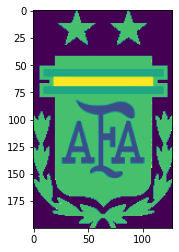

In [160]:
import numpy as np
from urllib import request
from PIL import Image
import matplotlib.pyplot as plt
NEGRO = 0
BLANCO = 255
CASI_BLANCO = 233
url = "https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/viernes/slices/AFALogo.bmp"
imagen = np.array(Image.open(request.urlopen(url)))
plt.imshow(imagen)

## 1) Ejercicio 1: Cortar las letras dentro del logo

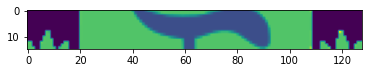

In [50]:
plt.imshow(imagen[85:100])

Intuimos en el "medio" del array 2 o 3 del corte de arriba encontraremos el color de las letras

In [51]:
imagen[85:100][5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 184, 181, 181, 181, 181, 181,
       181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181,
       181, 181, 181, 181, 181, 122,  61,  60,  60,  60,  60,  60,  60,
        60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  60,
        60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  60,
        60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  60,
        85, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181,
       181, 181, 181, 181, 178,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=uint8)

Debe ser 60, no?

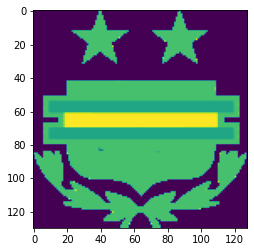

In [63]:
azul=60
plt.imshow(imagen[[(azul not in row) for row in imagen]])

Bingo. Ahora solo adaptamos lo que acabamos de encontrar:

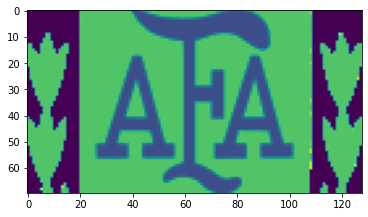

In [64]:
AFA = imagen[[(azul in row) for row in imagen]]
plt.imshow(AFA)

Ya tenemos el corte horizontal. Queda cortar verticalmente

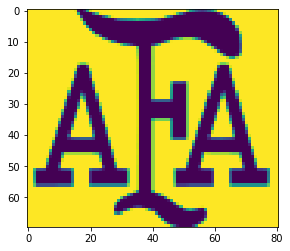

In [65]:
AFA = AFA[:,24:105]
plt.imshow(AFA)

No sé el por qué me va cambiando de color, pero bueno, las letras están cortadas. Podría haberlo hecho ligeramente más prolijo buscando dos columnas que tuviesen verde en todas las entradas, una en la izquierda y una en la derecha, que servirían como límites

## 2) Cortar las estrellas y transponerlas

Está claro que entre las estrellas y el resto del escudo hay un par de filas con completo negro. Lo lógico es hacer un slice desde la primer fila hasta la primer fila que es completamente negra

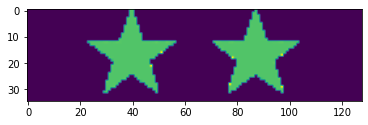

In [79]:
primer_fila_negra = [all(list(map(lambda x: x==0,fila))) for fila in imagen].index(True)
plt.imshow(imagen[:primer_fila_negra+1+2])

Otra vez, solo nos queda realizar un corte vertical

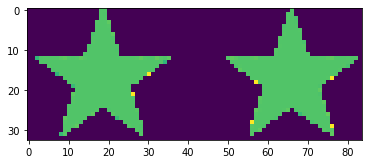

In [82]:
estrellas = imagen[:primer_fila_negra+1, 21:105]
plt.imshow(estrellas)

Para transponerlas supongo que servirá transponer literalmente la matriz

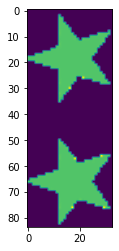

In [83]:
estrellas_transpuestas = np.transpose(estrellas)
plt.imshow(estrellas_transpuestas)

## 3) Ejercicio 3: Generar una mascara separando el color de fondo del logotipo

Se me ocurre aplicar simplemente un map a todos los elementos de la matriz de forma que:
- mascara$[i,j] = 255\mathbb{I}\{$imagen$[i,j] \neq 0\}$

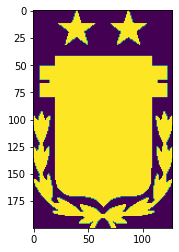

In [148]:
aplicar_a_toda_la_imagen = lambda funcion, imagen: np.array([list(map(funcion, fila)) for fila in imagen]).reshape(np.shape(imagen))
enmascarar = lambda entrada: BLANCO if entrada != NEGRO else NEGRO
mascara = aplicar_a_toda_la_imagen(enmascarar, imagen)
plt.imshow(mascara);

## 4) Ejercicio 4: Cambiar el color de fondo de blanco a negro

Mismo concepto que el ej anterior pero cambiando solo el fondo blanco

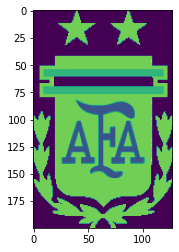

In [146]:
blanco_a_negro = lambda entrada: NEGRO if entrada >= CASI_BLANCO else entrada
imagen_con_fondo_negro = aplicar_a_toda_la_imagen(blanco_a_negro, imagen)
plt.imshow(imagen_con_fondo_negro);

## 5) Espejar la imagen

Este es el más fácil hasta ahora

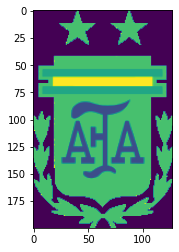

In [137]:
imagen_espejada = np.array([row[::-1] for row in imagen])
plt.imshow(imagen_espejada);

## 6) Dibujar una grilla (pista, usar strides)

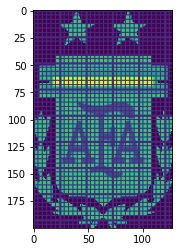

In [197]:
a_grid = lambda entrada: 30
imagen_con_grid = np.copy(imagen)
imagen_con_grid[::4] = aplicar_a_toda_la_imagen(a_grid, imagen[::4])
imagen_con_grid[1::24] = aplicar_a_toda_la_imagen(a_grid, imagen[1::24])

imagen_con_grid_transpuesta = np.transpose(imagen_con_grid)
imagen_con_grid_transpuesta[1::24] = aplicar_a_toda_la_imagen(a_grid, imagen_con_grid_transpuesta[1::24])
imagen_con_grid_transpuesta[::4] = aplicar_a_toda_la_imagen(a_grid, imagen_con_grid_transpuesta[::4])
imagen_con_grid = np.transpose(imagen_con_grid_transpuesta)
plt.imshow(imagen_con_grid);